In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("G:/My_Data/Indeed_Project/datascience.csv", encoding="utf-8")
df2 = pd.read_csv("G:/My_Data/Indeed_Project/ai.csv", encoding="utf-8")
df3 = pd.read_csv("G:/My_Data/Indeed_Project/dataanalyst.csv",  encoding="utf-8")
df4 = pd.read_csv("G:/My_Data/Indeed_Project/machinelearning.csv",  encoding="utf-8")
df5 = pd.read_csv("G:/My_Data/Indeed_Project/dataengineer.csv",  encoding="utf-8")


df=pd.concat([df1,df2,df3,df4,df5], axis=0).drop_duplicates()
df.shape

(3215, 6)

In [3]:
df=df[df.Sponsored!='Sponsored']
df.shape

(2319, 6)

In [4]:
df["Sponsored"].value_counts()

Organic    2319
Name: Sponsored, dtype: int64

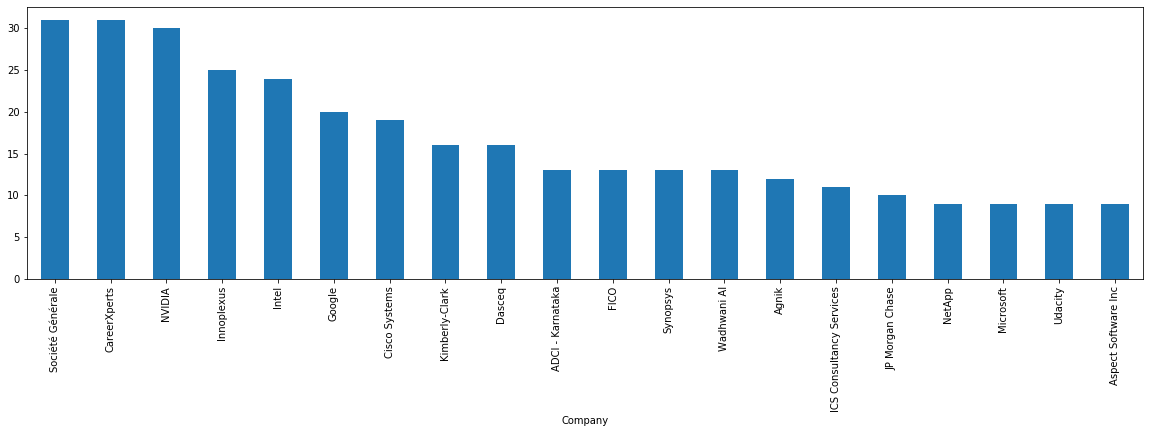

In [5]:
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot(kind = "bar",figsize=(20,5))

In [6]:
loc_counts = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
loc_counts

Location
Bengaluru, Karnataka    771
Mumbai, Maharashtra     278
Pune, Maharashtra       188
Hyderabad, Telangana    155
India                   113
Gurgaon, Haryana        105
Chennai, Tamil Nadu      99
Noida, Uttar Pradesh     69
New Delhi, Delhi         50
Ahmedabad, Gujarat       42
Name: Title, dtype: int64

In [7]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("₹","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("₹","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

410814.15277777775

In [8]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
import nltk
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df = df["Description"].apply(cleanData)

In [13]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

In [14]:
skills = ["experienced","expert","intern","intermediate","begineer","fresher"]

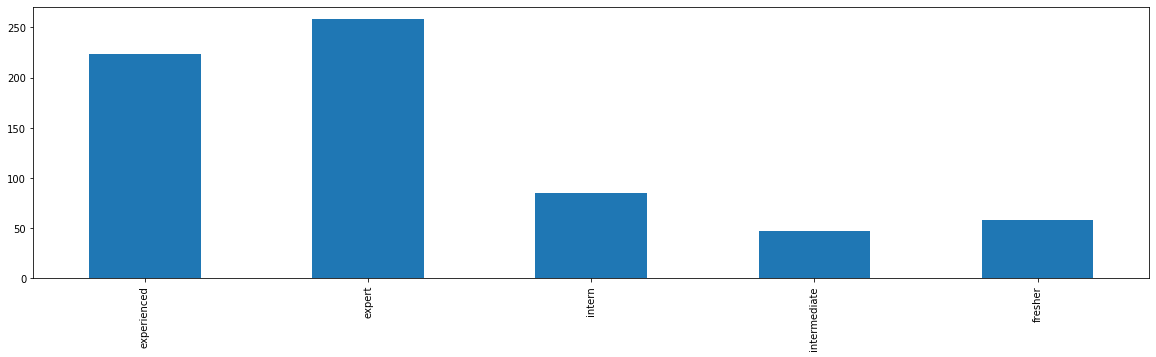

In [16]:
filter_series = result_series.filter(items=skills)
filter_series.plot(kind = 'bar',figsize=(20,5))